**Customer Data (customer_data.csv):**
- label: Good risk, bad risk
- id: Customer identification number.
- fea_1 to fea_11: These seem to be various features that could include demographic information, financial behavior characteristics, etc.

**Payment Data (payment_data.csv):**
- id: Customer identification number (this appears to be the common key with the customer data).
- OVD_t1 to OVD_t3: Overdraft times in different time windows.
- OVD_sum: Total sum of overdrafts.
- pay_normal: Normal payment occurrences.
- prod_code: Product code for the credit card or financial product.
- prod_limit: Credit limit on the product.
- update_date: Last update date for the record.
- new_balance: New balance on the account.
- highest_balance: The highest recorded balance.
- report_date: The date of the report.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

## Data loading and merging

In [2]:
# Load the datasets
customer_data_path = 'customer_data.csv'
payment_data_path = 'payment_data.csv'

customer_data = pd.read_csv(customer_data_path)
payment_data = pd.read_csv(payment_data_path)

In [3]:
customer_data.shape

(1125, 13)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   int64  
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 114.4 KB


In [5]:
payment_data.shape

(8250, 12)

In [6]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


## Data cleaning, including handling missing values

In [7]:
# Merge the datasets on the 'id' column
merged_data = pd.merge(customer_data, payment_data, on='id', how='inner')

In [8]:
merged_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [9]:
merged_data.shape

(8250, 24)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            7222 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   int64  
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

In [11]:
# Handling missing values by filling with median for numerical and mode for categorical data
numeric_columns = merged_data.select_dtypes(include=['number']).columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns

for column in numeric_columns:
    median_value = merged_data[column].median()
    merged_data[column].fillna(median_value, inplace=True)

for column in categorical_columns:
    mode_value = merged_data[column].mode()[0]
    merged_data[column].fillna(mode_value, inplace=True)

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   id               8250 non-null   int64  
 2   fea_1            8250 non-null   int64  
 3   fea_2            8250 non-null   float64
 4   fea_3            8250 non-null   int64  
 5   fea_4            8250 non-null   int64  
 6   fea_5            8250 non-null   int64  
 7   fea_6            8250 non-null   int64  
 8   fea_7            8250 non-null   int64  
 9   fea_8            8250 non-null   int64  
 10  fea_9            8250 non-null   int64  
 11  fea_10           8250 non-null   int64  
 12  fea_11           8250 non-null   float64
 13  OVD_t1           8250 non-null   int64  
 14  OVD_t2           8250 non-null   int64  
 15  OVD_t3           8250 non-null   int64  
 16  OVD_sum          8250 non-null   int64  
 17  pay_normal    

## EDA

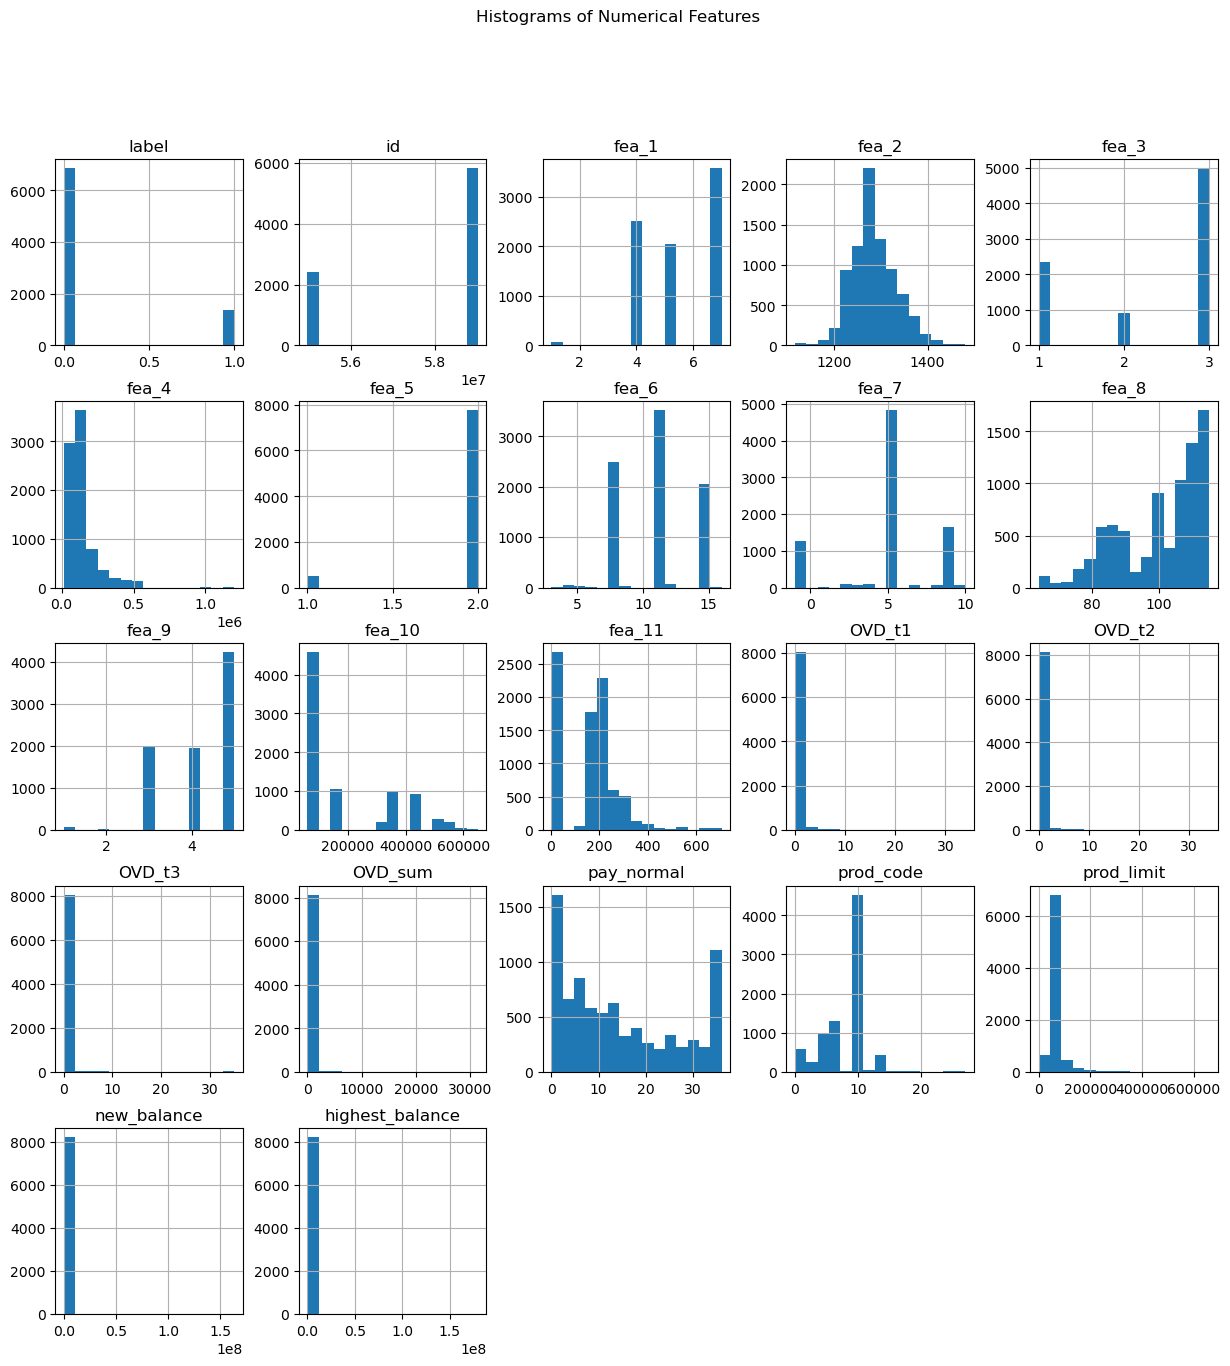

In [13]:
# EDA - Histograms for feature distributions
numeric_features = merged_data.select_dtypes(include=['number']).columns.tolist()
merged_data[numeric_features].hist(bins=15, figsize=(15, 15), layout=(5, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

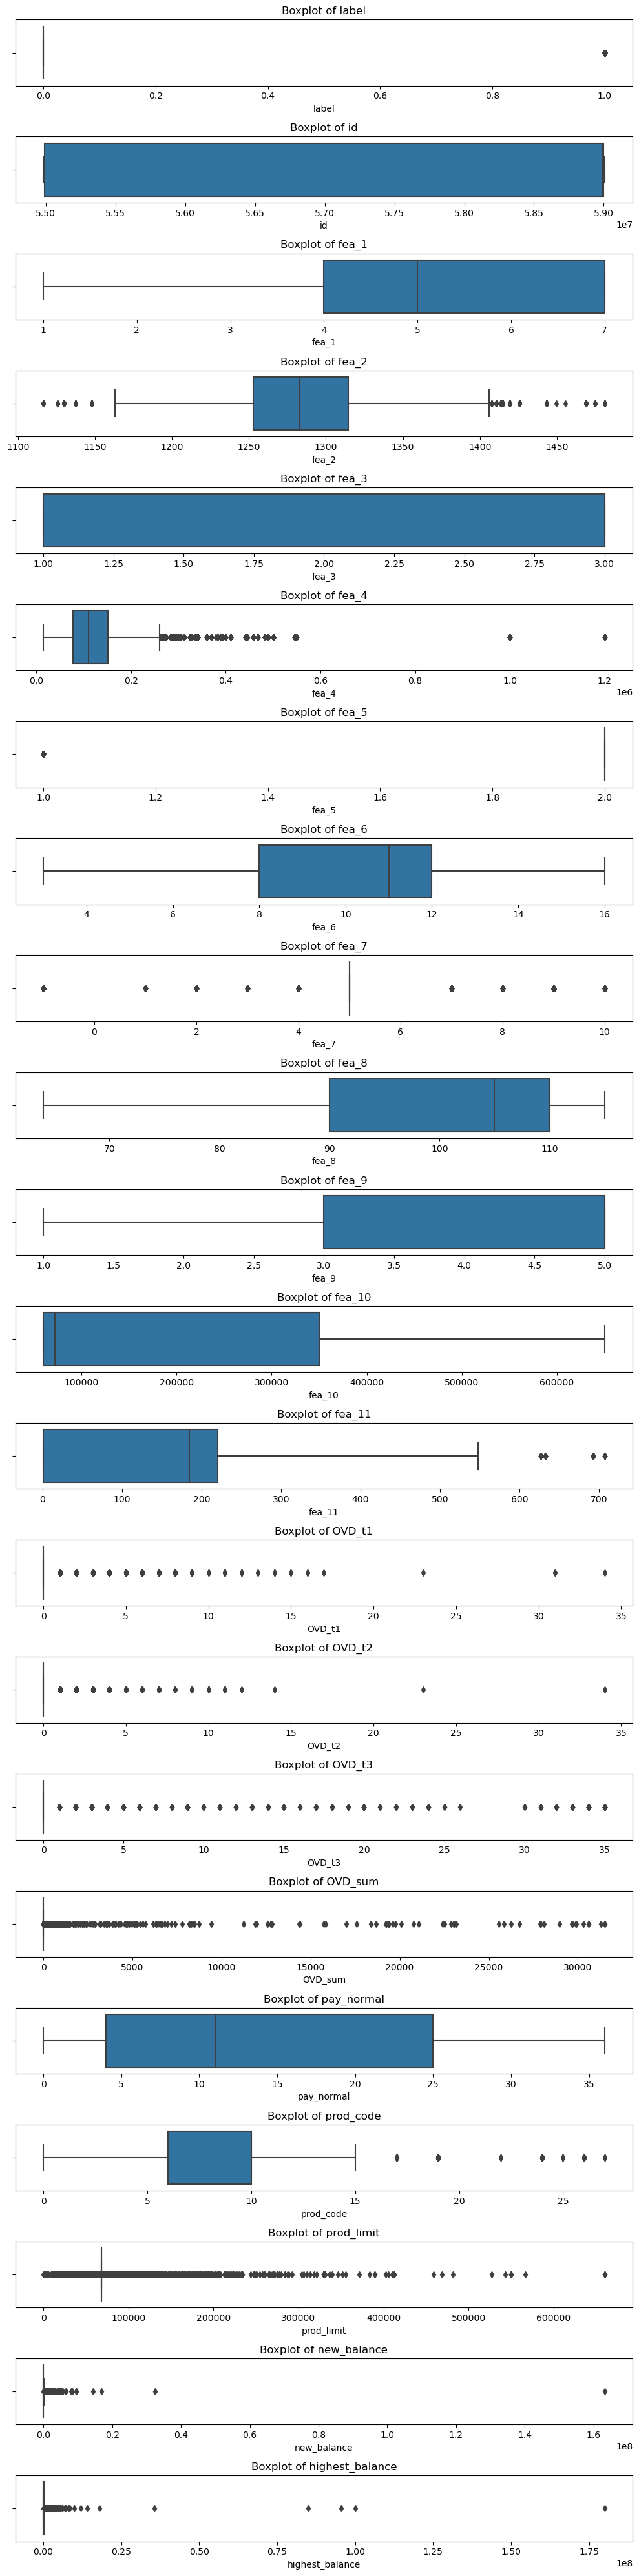

In [14]:
# EDA - Boxplots for detecting outliers
fig, ax = plt.subplots(len(numeric_features), 1, figsize=(10, 40))
for i, feature in enumerate(numeric_features):
    sns.boxplot(x=merged_data[feature], ax=ax[i])
    ax[i].set_title(f'Boxplot of {feature}', fontsize=12)
plt.tight_layout()
plt.show()

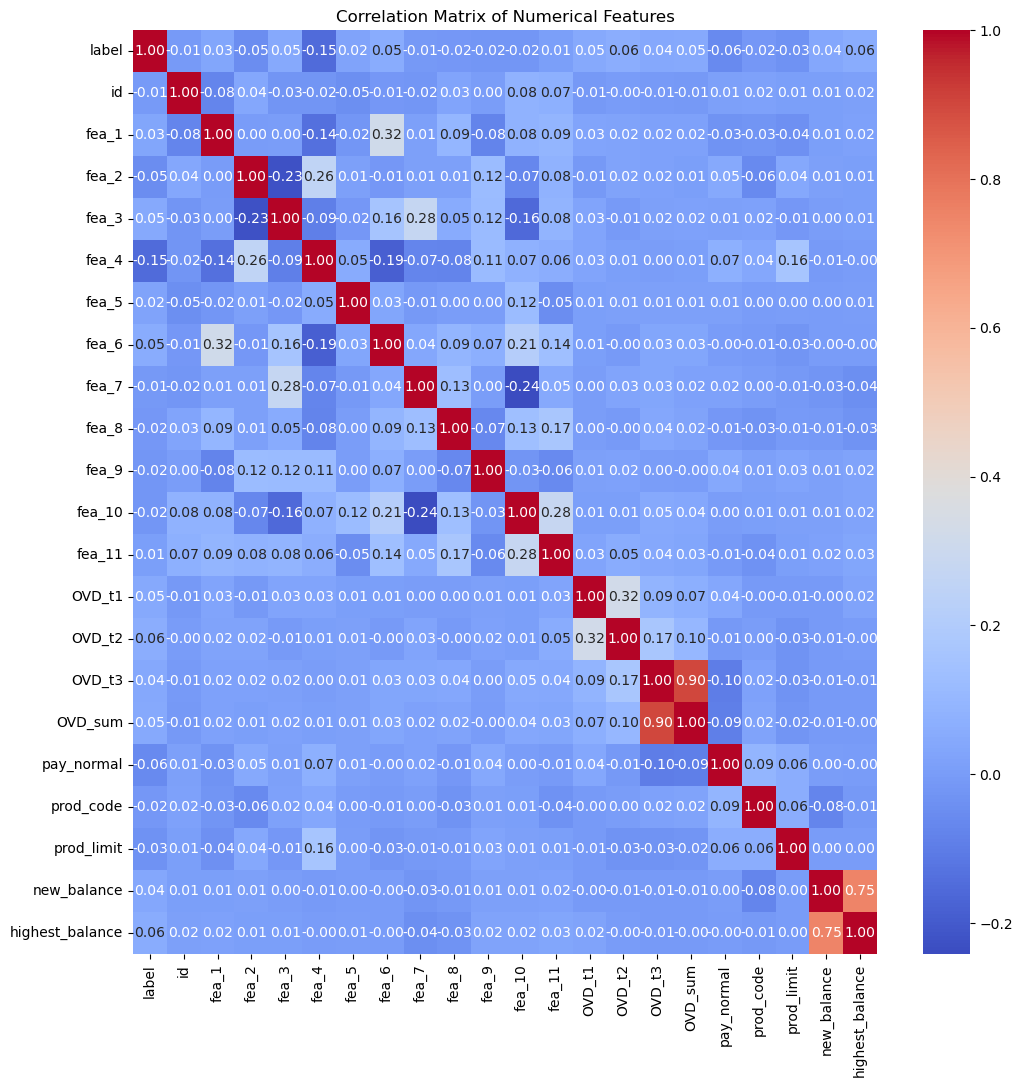

In [15]:
# EDA - Correlation matrix with heatmap
correlation_matrix = merged_data[numeric_features].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Histograms of Numerical Features
1. **Feature Distribution Variances**: Some features exhibit a relatively uniform distribution (e.g., 'fea_3'), while others, like 'fea_1' and 'fea_11', are heavily skewed. This suggests different types of variables in the dataset, possibly representing various aspects of customer behavior or attributes.
2. **Dominance of Lower Values**: Features like 'OVD_sum' and 'new_balance' show a concentration of values near the lower end, indicating that most customers might have low overdue sums or balances.
3. **Sparse or Rare High Values**: Several features have long tails to the right, such as 'highest_balance', which indicates the presence of a few customers with exceptionally high values in these features.
4. **Scale Differences**: There's a significant difference in the scale of values across features. For instance, 'fea_4' and 'fea_6' have smaller ranges compared to 'highest_balance'.
5. **Indication of Binary/Categorical Variables**: Some histograms, like those for 'fea_2' and 'fea_7', suggest the presence of binary or categorical features with limited unique values.

### Boxplots for Detecting Outliers
1. **Prevalence of Outliers**: Features like 'OVD_t1', 'OVD_t2', 'OVD_t3', and 'OVD_sum' have numerous outliers, indicating that a significant number of customers have values far from the median.
2. **Central Tendency**: Features such as 'fea_1', 'fea_3', and 'fea_5' have medians closer to the lower quartile, suggesting a left-skew.
3. **Varying Spreads**: The interquartile range varies significantly across features. For instance, 'fea_4' and 'fea_6' have a very narrow spread, indicating less variability among customers in these aspects.
4. **Extreme Values**: 'new_balance' and 'highest_balance' show extreme values as outliers, hinting at a few customers with very high balances.
5. **Skewness**: The placement of the box and the length of whiskers in plots like 'fea_11' and 'pay_normal' suggest right-skewed distributions.

### Correlation Matrix with Heatmap
1. **Strong Correlations**: Certain pairs of features show strong positive correlations, such as 'OVD_t2' with 'OVD_t3' and 'OVD_sum', suggesting that these overdue variables are closely related.
2. **Low or No Correlations**: Many pairs of features, like 'fea_1' with several others, exhibit very low correlations, indicating no significant linear relationship between them.
3. **Negative Correlations**: There are a few instances of negative correlations, though they seem to be weak. For example, 'fea_1' and 'fea_3' have a slightly negative correlation.
4. **Correlation Clusters**: Features related to overdue amounts ('OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum') tend to cluster together with high correlations, which could be indicative of common underlying factors.
5. **Independence of Certain Features**: Some features like 'fea_4' and 'fea_6' show low correlation with most other features, suggesting their independent nature in the dataset.

## Feature selection and engineering

In [16]:
# Setting pay_normal > 3 and utilization < 30% thresholds.

In [17]:
merged_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,18,10,68200.0,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000,2,15,5,109,...,0,0,0,1,5,68200.0,30/03/2009,0.0,150500.0,21/09/2015
3,1,54982665,5,1245.5,3,77000,2,15,5,109,...,2,26,11906,6,10,68200.0,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000,2,8,-1,100,...,0,0,0,4,6,68200.0,02/06/2016,15120.0,21500.0,19/04/2016


In [18]:
merged_data["label"].value_counts()

label
0    6863
1    1387
Name: count, dtype: int64

In [19]:
# Convert date columns to datetime and create new features
merged_data['update_date'] = pd.to_datetime(merged_data['update_date'], dayfirst=True)
merged_data['report_date'] = pd.to_datetime(merged_data['report_date'], dayfirst=True)
merged_data['account_age_days'] = (merged_data['report_date'] - merged_data['update_date']).dt.days

In [20]:
# Feature Selection
X = merged_data.drop(['id', 'label', 'update_date', 'report_date'], axis=1)
y = merged_data['label']

In [21]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

In [22]:
selected_features

Index(['fea_2', 'fea_3', 'fea_4', 'fea_6', 'OVD_t1', 'OVD_t2', 'OVD_sum',
       'pay_normal', 'highest_balance', 'account_age_days'],
      dtype='object')

In [23]:
# Selecting and scaling the top features
X_selected = X[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [24]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predicting on the test set and evaluating the model
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1384
           1       0.50      0.01      0.01       266

    accuracy                           0.84      1650
   macro avg       0.67      0.50      0.46      1650
weighted avg       0.78      0.84      0.77      1650



In [28]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1382    2]
 [ 264    2]]


The retrained logistic regression model using the selected features shows the following performance metrics:

Accuracy: 84%<br>
Precision for Class 0 (Good Risk): 84%<br>
Recall for Class 0 (Good Risk): 100%<br>
F1-Score for Class 0 (Good Risk): 91%<br>
Precision for Class 1 (Bad Risk): 50%<br>
Recall for Class 1 (Bad Risk): 1%<br>
F1-Score for Class 1 (Bad Risk): 1%<br>

In [29]:
# This shows that the model is biased towards predicting the majority class

In [30]:
# Try SMOTE, XgBoost, advanced models or ensemble techniques

In [41]:
# Tried SMOTE analysis (but got only maximum of 65% accuracy)

In [31]:
import xgboost as xgb # XgBoost is good with imbalanced datasets
from sklearn.model_selection import GridSearchCV

In [32]:
# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [33]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

In [34]:
# Set up GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', verbose=2)

In [35]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END cols

[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators

[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=7, n_estimators=300, subsa

[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsa

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=1

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsa

[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, sub

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=2

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsa

[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsa

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=2)

In [36]:
# Best parameters
best_params = grid_search.best_params_

In [37]:
# Train the XGBoost classifier with the best parameters
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
# Predict and evaluate the model
y_pred_xgb = xgb_best.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [39]:
# Print the evaluation results
print("Best Parameters:", best_params)
print("Classification Report - XGBoost:\n", report_xgb)
print("Confusion Matrix - XGBoost:\n", conf_matrix_xgb)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1384
           1       0.93      0.74      0.83       266

    accuracy                           0.95      1650
   macro avg       0.94      0.87      0.90      1650
weighted avg       0.95      0.95      0.95      1650

Confusion Matrix - XGBoost:
 [[1370   14]
 [  69  197]]


**Accuracy: 95%** <Br><Br>
**Precision for Class 0 (Good Risk):** 95%<Br><Br>
**Recall for Class 0 (Good Risk):** 99%<Br><Br>
**F1-Score for Class 0 (Good Risk):** 97%<Br><Br>
**Precision for Class 1 (Bad Risk):** 93%<Br><Br>
**Recall for Class 1 (Bad Risk):** 74%<Br><Br>
**F1-Score for Class 1 (Bad Risk):** 83%<Br><Br>